# Basketball IQ
Inspiration for this analysis
* [CraftedNBA - Beyond the Eye Test](https://craftednba.com/blog/an-attempt-to-quantify-basketball-iq/)
* [CraftedNBA - THE SMARTEST PLAYERS IN THE NBA](https://craftednba.com/player-traits/bball-iq)

## Metrics
* **Decision Efficiency (DE)**
    * Shot selection
    * Turnover discipline
* **Advantage Creation (AC)**
    * Passing
    * Creation
    * Advantage extensions
* **Defensive Recognition (DR)**
    * Rotations
    * Events generated via foresight
* **Team Impact Awareness (TIA)**
    * On/off ball + playtype efficiency blend

## Formulas

### Decision Efficiency (DE)
Measures the quality of decisions that directly end possessions.

$$DE = 0.4 \cdot \frac{TS}{xTS} + 0.35 \cdot (1 - TOV\%) + 0.25 \cdot Assist : Turnover$$

* $\frac{TS}{xTS}$ approximates shot quality relative to opportunities
* $TOV\%$ is turnover rate
* $Assist : Turnover$ approximates decision stability

### Advantage Creation (AC)
Rewards the ability to create advantages (playmaking + drives).

$$AC = 0.45 \cdot AST\% + 0.30 \cdot PotentialAST + 0.25 \cdot DrivesPerGame$$

### Defensive Recognition (DR)
Proxy for awareness, anticipation, and defensive rotations.

$$DR = 0.30 \cdot STL\% + 0.30 \cdot BLK\% + 0.40 \cdot DREB\%$$

### Team Impact Awareness (TIA)
This entire is based on a guesstimate of CraftedNBA's Basketball IQ advanced stat, thus having a z-score keeps it era-agnostic and matches their scaling logic (plus-minus style data).

$$OnOffNetRatingZ = NetRating_{on} - NetRating_{off}$$

Let
* $x =$ RAPTOR WAR for player that season
* $\mu =$ RAPTOR WAR for all players in that season
* $\sigma$ = standard deviation of RAPTOR WAR for all players in that season

$$RAPTOR\_WAR\_Z = \frac{x - \mu}{\sigma}$$

$$TIA = 0.6 \cdot OnOffNetRatingZ + 0.4 \cdot RAPTOR\_WAR\_Z$$

### Combine Metrics
According to CraftedNBA's blog [Beyond the Eye Test](https://craftednba.com/blog/an-attempt-to-quantify-basketball-iq/), decision-making and playmarking are primary, defense and impact are secondary.

$$RawIQ = 0.35DE + 0.35AC + 0.15DR + 0.15TIA$$

This can be standardised to a 0-100 scale:

$$IQ = 50 + 10 \cdot RAWIQ\_z$$

# Data Sets

In [94]:
import pandas as pd
import json

# Player Passing
with open('./data/passing.json') as f:
    passing_json = json.load(f)

headers = passing_json['resultSets'][0]['headers']
rows = passing_json['resultSets'][0]['rowSet']

passing_data = pd.DataFrame(rows, columns=headers)
passing_data = passing_data.drop(columns=['PLAYER_ID', 'TEAM_ID'])

passing_data.head()

,PLAYER_NAME,TEAM_ABBREVIATION,GP,W,L,MIN,PASSES_MADE,PASSES_RECEIVED,AST,FT_AST,SECONDARY_AST,POTENTIAL_AST,AST_POINTS_CREATED,AST_ADJ,AST_TO_PASS_PCT,AST_TO_PASS_PCT_ADJ
0,AJ Green,MIL,15,8,7,28.2,37.5,25.9,1.9,0.4,0.5,2.9,5.3,2.8,0.050,0.075
1,AJ Johnson,WAS,8,0,8,4.7,5.6,6.0,0.5,0.0,0.1,1.4,1.5,0.8,0.089,0.133
2,Aaron Gordon,DEN,12,9,3,30.4,30.7,33.5,1.4,0.1,0.1,3.1,3.6,1.6,0.046,0.052
3,Aaron Holiday,HOU,7,7,0,8.4,11.0,12.6,1.0,0.0,0.0,1.6,2.6,1.0,0.091,0.091
4,Aaron Nesmith,IND,11,1,10,30.4,38.5,38.3,1.5,0.3,0.5,3.0,4.5,2.4,0.040,0.061


In [95]:
# Drives-Per-Game
with open('./data/drives.json') as f:
    drives_json = json.load(f)

headers = drives_json['resultSets'][0]['headers']
rows = drives_json['resultSets'][0]['rowSet']

drives_data = pd.DataFrame(rows, columns=headers)
drives_data = drives_data.drop(columns=['PLAYER_ID', 'TEAM_ID'])

drives_data.head()

,PLAYER_NAME,TEAM_ABBREVIATION,GP,W,L,MIN,DRIVES,DRIVE_FGM,DRIVE_FGA,DRIVE_FG_PCT,...,DRIVE_PTS,DRIVE_PTS_PCT,DRIVE_PASSES,DRIVE_PASSES_PCT,DRIVE_AST,DRIVE_AST_PCT,DRIVE_TOV,DRIVE_TOV_PCT,DRIVE_PF,DRIVE_PF_PCT
0,AJ Green,MIL,15,8,7,28.2,1.2,0.1,0.3,0.500,...,0.3,0.222,0.9,0.778,0.1,0.111,0.0,0.000,0.0,0.000
1,AJ Johnson,WAS,8,0,8,4.7,1.3,0.0,0.6,0.000,...,0.3,0.200,0.5,0.400,0.3,0.200,0.0,0.000,0.1,0.100
2,Aaron Gordon,DEN,12,9,3,30.4,3.2,0.9,2.0,0.458,...,3.3,1.053,0.3,0.079,0.1,0.026,0.0,0.000,0.8,0.237
3,Aaron Holiday,HOU,7,7,0,8.4,2.0,0.4,0.6,0.750,...,1.7,0.857,1.0,0.500,0.3,0.143,0.0,0.000,0.4,0.214
4,Aaron Nesmith,IND,11,1,10,30.4,6.7,1.4,3.6,0.375,...,3.7,0.554,2.2,0.324,0.2,0.027,0.2,0.027,0.5,0.068


In [96]:
# Advanced Stats
with open('./data/advanced.json') as f:
    advanced_json = json.load(f)

headers = advanced_json['resultSets'][0]['headers']
rows = advanced_json['resultSets'][0]['rowSet']

advanced_data = pd.DataFrame(rows, columns=headers)
advanced_data = advanced_data.drop(columns=['PLAYER_ID', 'TEAM_ID', 'NICKNAME'])

advanced_data.head()

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,...,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,TEAM_COUNT
0,AJ Green,MIL,26,15,8,7,0.533,28.2,119.5,121.2,...,223,288,288,357,150,156,199,206,187,1
1,AJ Johnson,WAS,20,8,0,8,0.000,4.7,106.6,110.3,...,392,405,405,452,424,387,453,425,455,1
2,Aaron Gordon,DEN,30,12,9,3,0.750,30.4,124.9,125.8,...,346,353,353,72,62,83,50,77,90,1
3,Aaron Holiday,HOU,29,8,8,0,1.000,9.7,120.5,119.0,...,411,357,357,68,302,332,299,333,51,1
4,Aaron Nesmith,IND,26,11,1,10,0.091,30.4,107.9,109.6,...,149,276,276,283,135,91,117,68,378,1


In [97]:
# Shooting Stats
with open('./data/shooting.json') as f:
    shooting_json = json.load(f)

categories = shooting_json['resultSets']['headers'][0]['columnNames']
columns = shooting_json['resultSets']['headers'][1]['columnNames']
rows = shooting_json['resultSets']['rowSet']

category_columns = []
for category in categories:
    category_columns.extend([f"{category}_FGM", f"{category}_FGA", f"{category}_FG_PCT"])

final_columns = columns[:6] + category_columns

shooting_data = pd.DataFrame(rows, columns=final_columns)
shooting_data = shooting_data.drop(columns=['PLAYER_ID', 'TEAM_ID'])

shooting_data.head()

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,NICKNAME,Restricted Area_FGM,Restricted Area_FGA,Restricted Area_FG_PCT,In The Paint (Non-RA)_FGM,In The Paint (Non-RA)_FGA,In The Paint (Non-RA)_FG_PCT,...,Right Corner 3_FG_PCT,Above the Break 3_FGM,Above the Break 3_FGA,Above the Break 3_FG_PCT,Backcourt_FGM,Backcourt_FGA,Backcourt_FG_PCT,Corner 3_FGM,Corner 3_FGA,Corner 3_FG_PCT
0,AJ Green,MIL,26,AJ,0.1,0.1,0.500,0.3,0.4,0.667,...,0.818,1.8,4.7,0.386,0.0,0.0,0.0,1.3,1.8,0.704
1,AJ Johnson,WAS,20,AJ,0.1,0.8,0.167,0.1,0.4,0.333,...,0.000,0.0,0.1,0.000,0.0,0.0,0.0,0.0,0.3,0.000
2,Aaron Gordon,DEN,30,Aaron,3.6,4.5,0.796,0.4,1.6,0.263,...,0.286,1.8,3.8,0.489,0.0,0.0,0.0,0.5,1.4,0.353
3,Aaron Holiday,HOU,29,Aaron,0.6,0.7,0.800,0.3,0.4,0.667,...,1.000,0.6,1.5,0.417,0.0,0.0,0.0,0.4,0.5,0.750
4,Aaron Nesmith,IND,26,Aaron,1.3,2.6,0.483,0.5,2.0,0.273,...,0.417,2.1,5.6,0.371,0.0,0.0,0.0,0.7,1.9,0.381


In [98]:
# Defense
with open('./data/defense.json') as f:
    defense_json = json.load(f)

headers = defense_json['resultSets'][0]['headers']
rows = defense_json['resultSets'][0]['rowSet']

defense_data = pd.DataFrame(rows, columns=headers)
defense_data = defense_data.drop(columns=['PLAYER_ID', 'TEAM_ID', 'NICKNAME'])

defense_data.head()

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,DEF_RATING,DREB,...,PCT_DREB_RANK,STL_RANK,PCT_STL_RANK,BLK_RANK,PCT_BLK_RANK,OPP_PTS_OFF_TOV_RANK,OPP_PTS_2ND_CHANCE_RANK,OPP_PTS_FB_RANK,OPP_PTS_PAINT_RANK,DEF_WS_RANK
0,AJ Green,MIL,26,18,8,10,0.444,28.4,117.9,2.6,...,341,318,399,375,380,371,301,303,367,249
1,AJ Johnson,WAS,20,8,0,8,0.000,4.7,126.9,0.4,...,389,426,426,382,382,69,65,37,38,443
2,Aaron Gordon,DEN,30,13,10,3,0.769,28.3,105.0,4.5,...,208,191,252,255,294,205,243,259,362,22
3,Aaron Holiday,HOU,29,10,9,1,0.900,11.9,101.2,0.5,...,454,285,235,350,318,57,199,87,103,163
4,Aaron Nesmith,IND,26,11,1,10,0.091,30.4,116.6,2.9,...,320,173,198,225,258,379,341,409,424,204


# Decision Efficiency (DE)

In [99]:
bronny_advanced_data = advanced_data[advanced_data['PLAYER_NAME'] == 'Bronny James']

expected_true_shooting_pct = advanced_data['TS_PCT'].mean()
bronny_true_shooting_pct = bronny_advanced_data['TS_PCT']
bronny_assist_turnover_ratio = bronny_advanced_data['AST_TO']
bronny_turnover_pct = bronny_advanced_data['E_TOV_PCT'] / 100

decision_efficiency = (0.4 * bronny_true_shooting_pct / expected_true_shooting_pct) + (0.35 * (1 - bronny_turnover_pct)) + (0.25 * bronny_assist_turnover_ratio)
decision_efficiency

51    1.1276
dtype: float64

In [100]:
advanced_data['DECISION_EFFICIENCY'] = (
    (0.4 * advanced_data['TS_PCT'] / expected_true_shooting_pct) +
    (0.35 * (1 - advanced_data['TM_TOV_PCT'] / 100)) +
    (0.25 * advanced_data['AST_TO'])
)

filtered_de_data = advanced_data[advanced_data['MIN'] > 15]

sorted_de_data = filtered_de_data[['PLAYER_NAME', 'DECISION_EFFICIENCY']].sort_values(by='DECISION_EFFICIENCY', ascending=False)
sorted_de_data['RANK'] = range(1, len(sorted_de_data) + 1)
sorted_de_data = sorted_de_data[['RANK', 'PLAYER_NAME', 'DECISION_EFFICIENCY']]

sorted_de_data[sorted_de_data['DECISION_EFFICIENCY'] != 0]

,RANK,PLAYER_NAME,DECISION_EFFICIENCY
299,1,LeBron James,3.778847
429,2,Tim Hardaway Jr.,2.456163
110,3,Dean Wade,2.132776
248,4,Jordan Walsh,2.001555
325,5,Mikal Bridges,1.983591
...,...,...,...
131,288,Drew Eubanks,0.814947
233,289,John Collins,0.793105
465,290,Zach Edey,0.777886
202,291,James Wiseman,0.647207


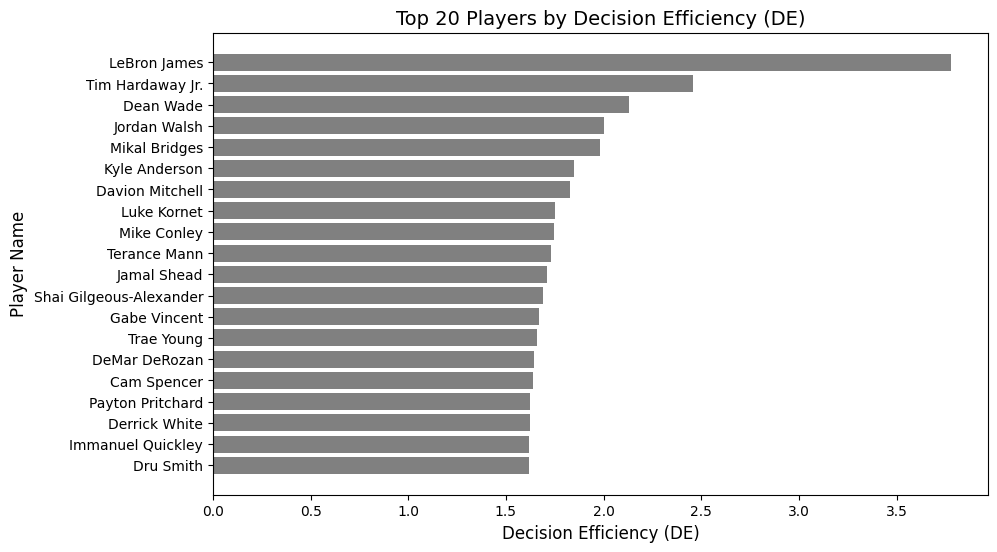

In [101]:
import matplotlib.pyplot as plt

top_de_data = sorted_de_data.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_de_data['PLAYER_NAME'], top_de_data['DECISION_EFFICIENCY'], color='grey')
plt.xlabel('Decision Efficiency (DE)', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.title('Top 20 Players by Decision Efficiency (DE)', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# Advantage Creation (AC)

In [102]:
bronny_passing_data = passing_data[passing_data['PLAYER_NAME'] == 'Bronny James']
bronny_drives_data = drives_data[drives_data['PLAYER_NAME'] == 'Bronny James']

ast_pct = bronny_advanced_data['AST_PCT']
potential_ast = bronny_passing_data['POTENTIAL_AST']
drives = bronny_drives_data['DRIVES']

advantage_creation = (0.45 * ast_pct) + (0.3 * potential_ast) + (0.25 * drives)
advantage_creation

51    1.3799
dtype: float64

In [103]:
advanced_data['ADVANTAGE_CREATION'] = (
    (0.45 * advanced_data['AST_PCT']) +
    (0.30 * passing_data['POTENTIAL_AST']) +
    (0.25 * drives_data['DRIVES'])
)

filtered_ac_data = advanced_data[advanced_data['MIN'] > 15]

sorted_ac_data = filtered_ac_data[['PLAYER_NAME', 'ADVANTAGE_CREATION']].sort_values(by='ADVANTAGE_CREATION', ascending=False)
sorted_ac_data['RANK'] = range(1, len(sorted_ac_data) + 1)

sorted_ac_data = sorted_ac_data[['RANK', 'PLAYER_NAME', 'ADVANTAGE_CREATION']]

sorted_ac_data[sorted_ac_data['ADVANTAGE_CREATION'] != 0]

,RANK,PLAYER_NAME,ADVANTAGE_CREATION
59,1,Cade Cunningham,10.10400
250,2,Josh Giddey,9.04540
409,3,Shai Gilgeous-Alexander,8.58350
189,4,Jalen Brunson,8.36360
119,5,Devin Booker,8.32720
...,...,...,...
153,288,Goga Bitadze,0.46135
131,289,Drew Eubanks,0.43125
17,290,Andre Drummond,0.40300
399,291,Ryan Kalkbrenner,0.39900


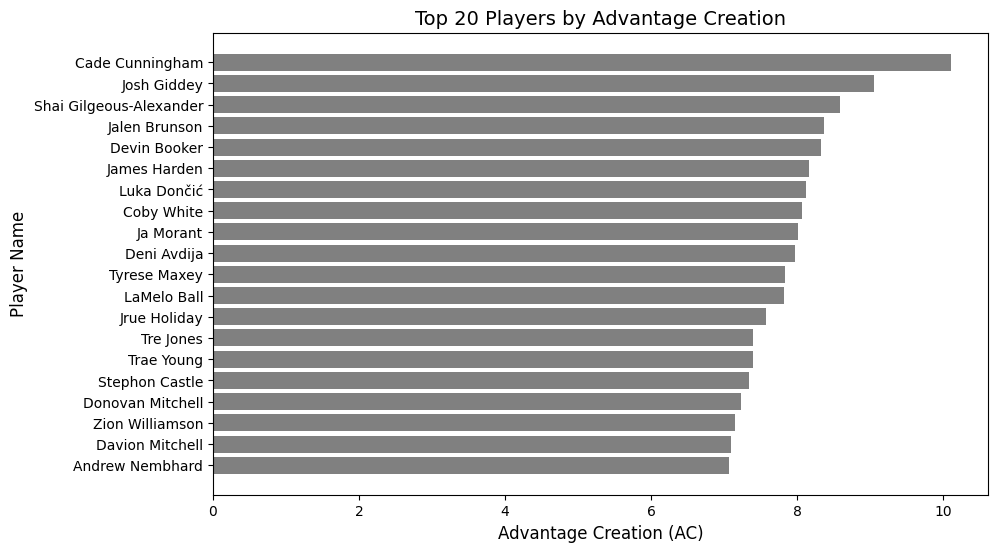

In [104]:
top_ac_data = sorted_ac_data.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_ac_data['PLAYER_NAME'], top_ac_data['ADVANTAGE_CREATION'], color='grey')
plt.xlabel('Advantage Creation (AC)', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.title('Top 20 Players by Advantage Creation', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# Defensive Recognition

In [105]:
bronny_defense_data = defense_data[defense_data['PLAYER_NAME'] == 'Bronny James']

stl_pct = bronny_defense_data['PCT_STL']
blk_pct = bronny_defense_data['PCT_BLK']
dreb_pct = bronny_defense_data['DREB_PCT']

defensive_recognition = (0.3 * stl_pct) + (0.3 * blk_pct) + (0.4 * dreb_pct)
defensive_recognition

51    0.1417
dtype: float64

In [106]:
defense_data['DEFENSIVE_RECOGNITION'] = (
    (0.3 * defense_data['PCT_STL']) +
    (0.3 * defense_data['PCT_BLK']) +
    (0.4 * defense_data['DREB_PCT'])
)

filtered_dr_data = defense_data[defense_data['MIN'] > 15]

sorted_dr_data = filtered_dr_data[['PLAYER_NAME', 'DEFENSIVE_RECOGNITION']].sort_values(by='DEFENSIVE_RECOGNITION', ascending=False)
sorted_dr_data['RANK'] = range(1, len(sorted_dr_data) + 1)

sorted_dr_data = sorted_dr_data[['RANK', 'PLAYER_NAME', 'DEFENSIVE_RECOGNITION']]

sorted_dr_data[sorted_dr_data['DEFENSIVE_RECOGNITION'] != 0]

,RANK,PLAYER_NAME,DEFENSIVE_RECOGNITION
461,1,Victor Wembanyama,0.3863
106,2,Day'Ron Sharpe,0.3648
464,3,Walker Kessler,0.3444
407,4,Ryan Kalkbrenner,0.3378
126,5,Donovan Clingan,0.3309
...,...,...,...
0,295,AJ Green,0.0711
103,296,Darius Garland,0.0644
250,297,Jordan Hawkins,0.0537
44,298,Bradley Beal,0.0508


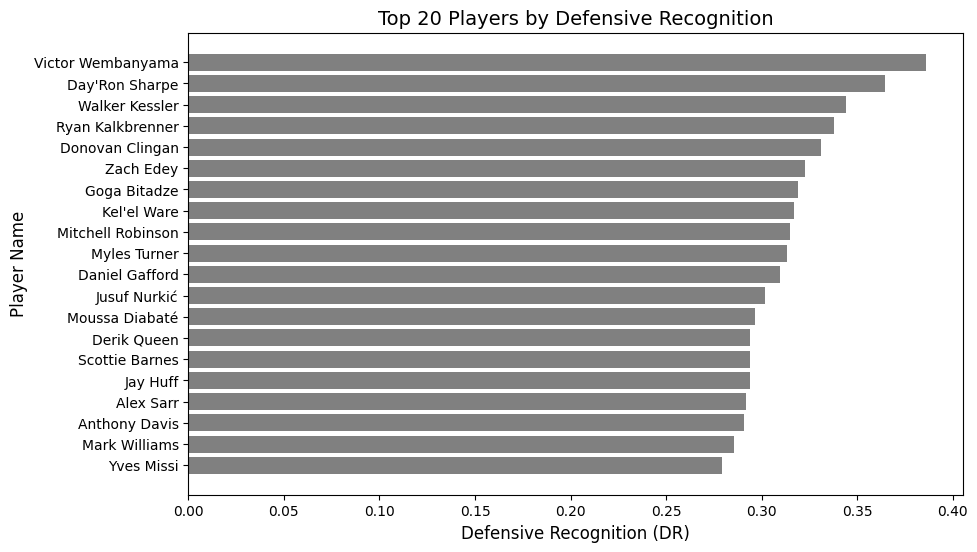

In [107]:
top_dr_data = sorted_dr_data.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_dr_data['PLAYER_NAME'], top_dr_data['DEFENSIVE_RECOGNITION'], color='grey')
plt.xlabel('Defensive Recognition (DR)', fontsize=12)
plt.ylabel('Player Name', fontsize=12)
plt.title('Top 20 Players by Defensive Recognition', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# Team Impact Awareness (TIA)